In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras import Sequential, Input
from keras.layers import Dense

df = pd.read_csv('https://drive.google.com/uc?id=1roJ83AbgzDcvRr0Gwud0BmdUQx-oSG-w')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df = df.drop(columns='Id')

category = pd.get_dummies(df['Species'], dtype=int)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [3]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [4]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [5]:
# Pilih 4 kolom pertama
X = dataset[:, 0:4]
#Pilih3 kolom terakhir sebagai label
y = dataset[:, 4:7]

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.3)

In [ ]:
model = Sequential([Input(shape=(4,)),
                    Dense(64, activation='relu'), 
                    Dense(64, activation='relu'),
                    Dense(3, activation='softmax')])

model.compile(optimizer='Adam', loss='categorical_crossentropy',
metrics=['accuracy'])

2025-10-25 01:04:06.677359: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-10-25 01:04:06.677398: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-10-25 01:04:06.677406: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-10-25 01:04:06.677430: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-25 01:04:06.677445: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


: 

In [ ]:
hist = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100


In [ ]:
model.evaluate(X_test, Y_test, batch_size=1)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.9778 - loss: 0.0524   


[0.05236131697893143, 0.9777777791023254]

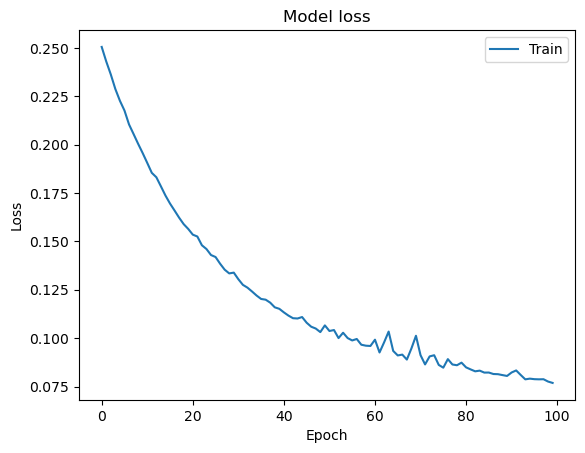

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train'], loc='upper right')
plt.show()

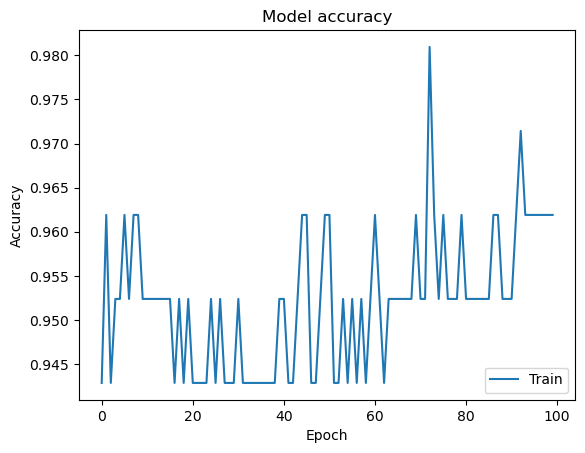

In [ ]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='lower right')
plt.show()

In [ ]:
from keras.layers import Dropout, BatchNormalization

model = Sequential([Input(shape=(4,)),
                    Dense(64, activation='relu'), 
                    Dense(64, activation='relu'), 
                    Dropout(0,5),
                    BatchNormalization(momentum=0.99),
                    Dense(3, activation='softmax')])

In [ ]:
## Optimasi Training menggunakan Callback
import tensorflow as tf

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(X_train, Y_train, epochs=100)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4667 - loss: 1.0214  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7905 - loss: 0.5645 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9048 - loss: 0.4051 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9333 - loss: 0.3634 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8952 - loss: 0.3337 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9143 - loss: 0.3047 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9619 - loss: 0.2569 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9333 - loss: 0.2442 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9429 - loss: 0.2303 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9524 - loss: 0.2308 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9429 - loss: 0.2078 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9429 - lo

In [ ]:
#Early stopping
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9):
            print("\nAkurasi telah mencapai 90%")
            self.model.stop_training = True

callbacks = myCallback() 

hist = model.fit(X_train, Y_train, epochs=100, callbacks= [callbacks])

Epoch 1/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9375 - loss: 0.1105
Akurasi telah mencapai 90%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9810 - loss: 0.0548 
